In [30]:
import pandas as pd
import quandl as qdl
import matplotlib
import matplotlib.pyplot as plot

In [31]:
bits = qdl.get("BCHARTS/ABUCOINSUSD", authtoken="1tzpsLbPW6RgC9Q_-vCG", start_date="2017-11-01")
del bits.index.name

In [32]:
bits['Daily Return'] = bits['Close'].pct_change(1)
bits.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,Daily Return
2017-11-01,6630.39,6694.38,6552.60,6694.38,4.086917,27107.928641,6632.855192,NaN
2017-11-02,6749.21,7461.58,6738.06,7069.03,23.690248,165882.628216,7002.148247,0.055965
2017-11-03,7072.06,7407.69,6970.30,7199.62,9.286668,67159.311756,7231.798684,0.018474
2017-11-04,7181.92,7457.87,6972.84,7369.08,10.022798,72853.350720,7268.763614,0.023537
2017-11-05,7376.53,7601.17,7307.19,7400.39,7.328631,54811.366113,7479.073187,0.004249


In [33]:
high = bits.High
bits_rolling_20_high = high.rolling(20).mean()
bits_rolling_50_high = high.rolling(50).mean()
volumeBTC = bits["Volume (BTC)"]
volumeCurrency = bits["Volume (Currency)"];

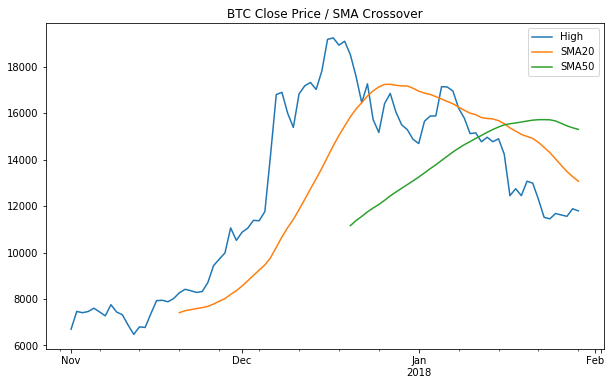

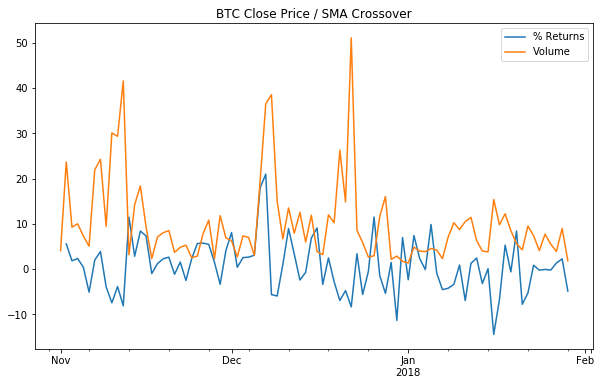

In [34]:
pd.DataFrame({   
    'High': high,
    'SMA20': bits_rolling_20_high,
    'SMA50': bits_rolling_50_high
}).plot(title='BTC Close Price / SMA Crossover')
pd.DataFrame({   
    '% Returns': bits['Daily Return'] * 100,
    'Volume': volumeBTC
}).plot(title='BTC Close Price / SMA Crossover')


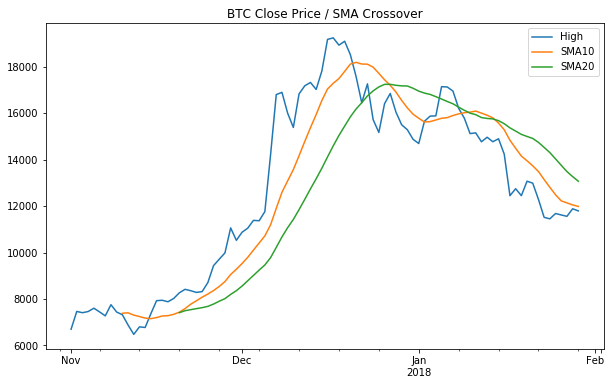

In [35]:
bits_rolling_10_high = high.rolling(10).mean()
bits_rolling_20_high = high.rolling(20).mean()
pd.DataFrame({   
    'High': high,
    'SMA10': bits_rolling_10_high,
    'SMA20': bits_rolling_20_high
}).plot(title='BTC Close Price / SMA Crossover')

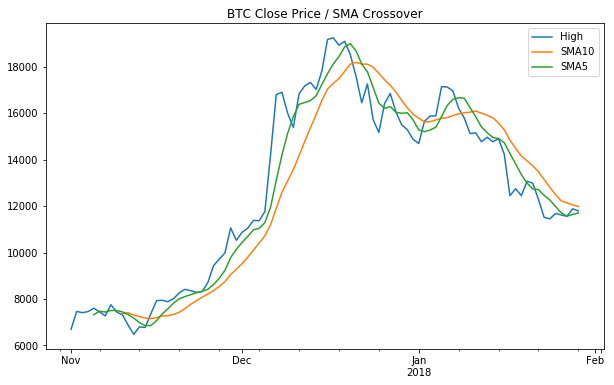

In [36]:
bits_rolling_5_high = high.rolling(5).mean()
bits_rolling_10_high = high.rolling(10).mean()
pd.DataFrame({   
    'High': high,
    'SMA5': bits_rolling_5_high,
    'SMA10': bits_rolling_10_high
}).plot(title='BTC Close Price / SMA Crossover')

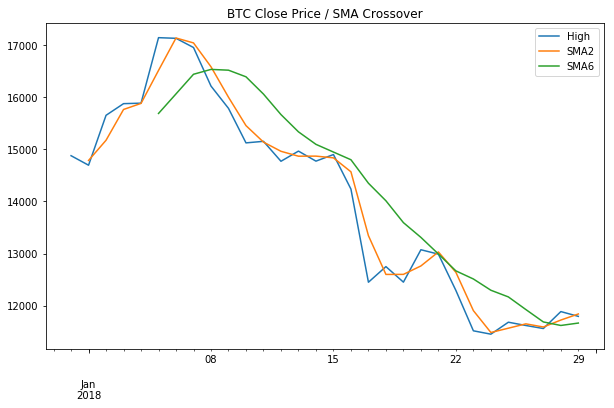

In [37]:
high = high.tail(30)
bits_rolling_2_high = high.rolling(2).mean()
bits_rolling_6_high = high.rolling(6).mean()
pd.DataFrame({   
    'High': high,
    'SMA2': bits_rolling_2_high,
    'SMA6': bits_rolling_6_high
}).plot(title='BTC Close Price / SMA Crossover')

Twitter Sentiment Analysis - Bag of Words Model - Machine Learning

In [38]:
import tweepy 
from textblob import TextBlob

In [39]:
consumer_key = 'fba8sGRIIg0EoQOtfgxHGv7EI'
consumer_secret = 'z8LKzW9epwOPWsYfE1QXIApFlo1VrbM6rGP9K7zdr9tXa3TocS'
access_token = '893107128092606465-r9EFEkdoAoQyuHEOSMrQMdvUG7rAOBO'
access_token_sedret = 'ZeGap5yg7GF7WdJ31wG2vb3NxVALCH5PUJj6hsCPPOv5e'

In [40]:
consumer_key = 'fba8sGRIIg0EoQOtfgxHGv7EI'
consumer_secret = 'z8LKzW9epwOPWsYfE1QXIApFlo1VrbM6rGP9K7zdr9tXa3TocS'
access_token = '893107128092606465-r9EFEkdoAoQyuHEOSMrQMdvUG7rAOBO'
access_token_sedret = 'ZeGap5yg7GF7WdJ31wG2vb3NxVALCH5PUJj6hsCPPOv5e'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_sedret)
api = tweepy.API(auth)

In [41]:
public_tweets = api.search('BTC')

In [42]:
for tweet in public_tweets:
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

Sentiment(polarity=-0.0361111111111111, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.45, subjectivity=0.875)
Sentiment(polarity=-0.012500000000000011, subjectivity=0.85)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


In [43]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plot', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [44]:
bitsDbl = qdl.get("BCHARTS/ABUCOINSUSD", authtoken="1tzpsLbPW6RgC9Q_-vCG", start_date="2017-11-01")

/usr/local/lib/python3.6/site-packages/backtrader/plot/plot.py:127: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/sit

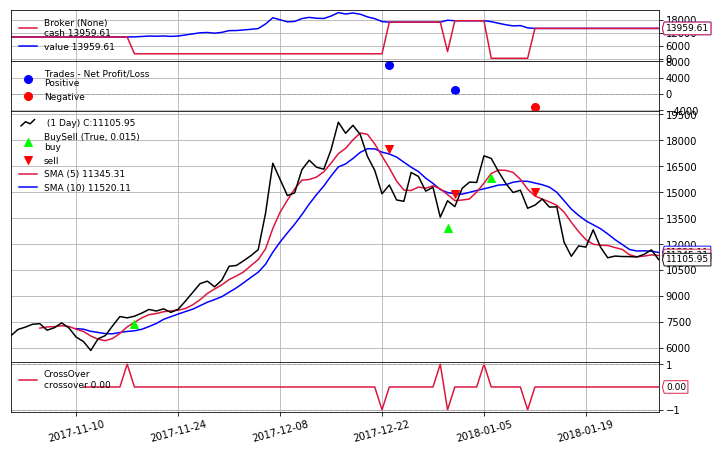

[[<matplotlib.figure.Figure at 0x11884e438>]]

In [45]:
from datetime import datetime
import backtrader as bt

class SmaCross(bt.SignalStrategy):
    params = (('pfast', 5), ('pslow', 10),)
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=self.p.pfast), bt.ind.SMA(period=self.p.pslow)
        self.signal_add(bt.SIGNAL_LONG, bt.ind.CrossOver(sma1, sma2))

cerebro = bt.Cerebro()
cerebro.broker.setcommission(commission=0.0149)
data = bt.feeds.PandasData(dataname=bitsDbl)

cerebro.adddata(data)

cerebro.addstrategy(SmaCross)



cerebro.run()
cerebro.plot(volume=False)